# Simple Logistic Regression

In [1]:
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Hill Climbing

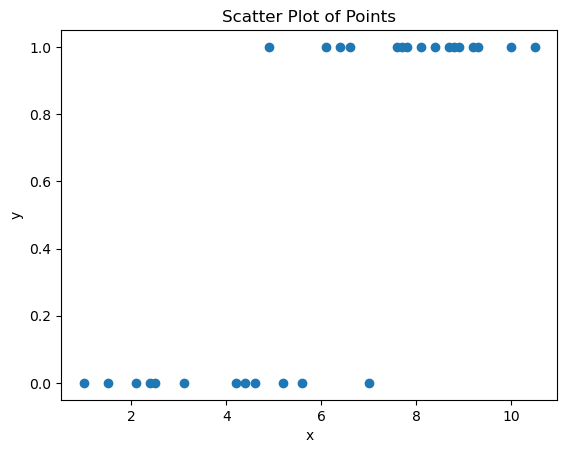

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return "{0},{1}".format(self.x, self.y)
    
def plot_points(points, plot_title=True):
    # Extract x and y coordinates from points
    x_coords = [p.x for p in points]
    y_coords = [p.y for p in points]

    # Create scatter plot
    plt.scatter(x_coords, y_coords)
    if plot_title:
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Scatter Plot of Points')
    plt.show()

def plot_result(range_x,b0, b1, points, log_likelihood, epoch):
    plt.plot(range_x, [predict_probability(x, b0, b1) for x in range_x], 'b-')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Logistic Regression | epoch {epoch} | b0: {b0:.3f}, b1: {b1:.3f}, log likelihood: {log_likelihood:.3f}")
    plot_points(points, False)
    
# calculate maximum likelihood  
def predict_probability(x, b0, b1):
    p = 1.0 / (1.0001 + math.exp(-(b0 + b1 * x)))
    return p

points = [(Point(row.x, row.y)) for index, row in pd.read_csv("simplelogreg_data.txt").iterrows()]
points = [(Point(row.x, row.y)) for index, row in pd.read_csv("simplelogreg_data_extended.txt").iterrows()]


min_x = min(p.x for p in points)
max_x = max(p.x for p in points)
# range_x = np.linspace(min_x, max_x, 100)
range_x = np.linspace(-5, 12, 1000)

num_iter = 50_000
best_likelihood = -10_000_000
b0 = .01
b1 = .01

b_values = [(b0, b1)]
log_likelihoods = [best_likelihood]

plot_points(points)

1.0 / (1 + exp(-(-8.774372326683142 + 1.5146366847498798*x))
BEST LIKELIHOOD: -6.18608368970012
Hill climbing finished after 50000 iterations, with 247 adjustments.


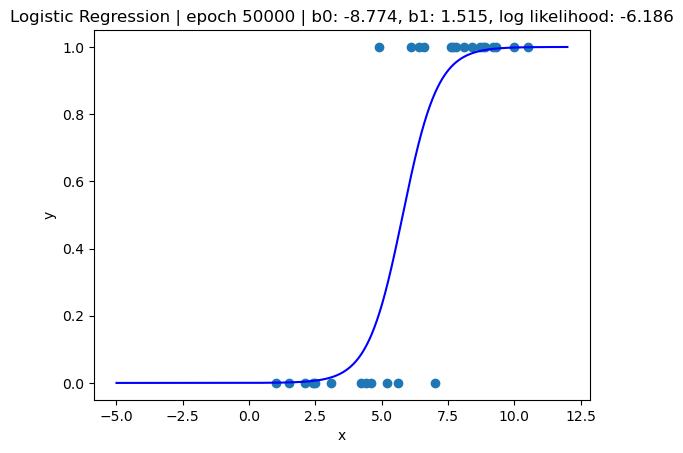

In [3]:
for i in range(num_iter):

    # Select b0 or b1 randomly, and adjust it randomly
    random_b = random.choice(range(2))

    # sample from normal distribution
    random_adjust = np.random.normal()

    if random_b == 0:
        b0 += random_adjust
    elif random_b == 1:
        b1 += random_adjust

    # Calculate total likelihood
    true_estimates = sum(math.log(predict_probability(p.x, b0, b1)) for p in points if p.y == 1.0)
    false_estimates = sum(math.log(1.0 - predict_probability(p.x, b0, b1)) for p in points if p.y == 0.0)

    total_likelihood = true_estimates + false_estimates

    # If likelihood improves, keep the random adjustment. Otherwise revert.
    if best_likelihood < total_likelihood:
        best_likelihood = total_likelihood
        b_values.append((b0, b1))
        log_likelihoods.append(total_likelihood)
    elif random_b == 0:
        b0 -= random_adjust
    elif random_b == 1:
        b1 -= random_adjust

    # if i == 0 or (i+1) % 1000 == 0:
    #     print(f"{i}/{num_iter}")
    #     print(f"b0: {b0:.3f}, b1: {b1:.3f}, log likelihood: {total_likelihood:.3f}")
    #     plot_result(range_x, b0, b1, points, total_likelihood, i)

print("1.0 / (1 + exp(-({0} + {1}*x))".format(b0, b1))
print("BEST LIKELIHOOD: {0}".format(best_likelihood))
print(f"Hill climbing finished after {num_iter} iterations, with {len(b_values)} adjustments.")
plot_result(range_x, b0, b1, points, best_likelihood, num_iter)


## Matrix Notation and Gradient Descent

$$
h_{\beta}(X) = \frac{1}{1+e^{-X \beta}} = \frac{e^{X \beta}}{1+e^{X \beta}} \\
L(X,y,\beta) = \prod h_{\beta}(X)^y \cdot (1-h_{\beta}(X))^{1-y} \\

L(X,y,\beta) = \sum y \cdot log(h_{\beta}(X)) + (1-y) \cdot log(1-h_{\beta}(X)) \\
L(X,y,\beta) = \sum y \cdot log((1+e^{-X \beta})^{-1}) + (1-y) \cdot log(1 - \frac{1}{1+e^{-X \beta}}) \\
L(X,y,\beta) = \sum y \cdot log((1+e^{-X \beta})^{-1}) + (1-y) \cdot log(\frac{1+e^{-X \beta}}{1+e^{-X \beta}} - \frac{1}{1+e^{-X \beta}}) \\
L(X,y,\beta) = \sum -y \cdot log(1+e^{-X \beta}) + (1-y) \cdot log(\frac{e^{-X \beta}}{1+e^{-X \beta}}) \\
L(X,y,\beta) = \sum -y \cdot log(1+e^{-X \beta}) + (1-y) \cdot (log(e^{-X \beta}) - log(1+e^{-X \beta})) \\
L(X,y,\beta) = \sum -y \cdot log(1+e^{-X \beta}) + (1-y) \cdot (-X \beta \cdot 1 - log(1+e^{-X \beta})) \\
L(X,y,\beta) = \sum (1-y) \cdot (-X \beta \cdot 1) \\
L(X,y,\beta) = \sum -X \beta - log(1+e^{-X \beta}) + y X \beta \\
L(X,y,\beta) = \sum -(log(e^{X \beta}) + log(1+e^{-X \beta})) + y X \beta \\
L(X,y,\beta) = \sum -(log(e^{X \beta} \cdot (1+e^{-X \beta}))) + y X \beta \\
L(X,y,\beta) = \sum -log(e^{X \beta} +1) + y X \beta \\
\frac{\delta}{\delta \beta}  y X \beta = yX \\
\frac{\delta}{\delta \beta} log(e^{X \beta} + 1) = \frac{1}{e^{X \beta} + 1} \cdot X e^{X \beta}
= X \cdot h_{\beta}(X) \\

\frac{\delta}{\delta \beta} L(X,y,\beta) = -X \cdot h_{\beta}(X) + yX \\
\frac{\delta}{\delta \beta} L(X,y,\beta) = X \cdot (y - h_{\beta}(X)) \\
$$    

0/100000
beta: [0.09902247 0.10320111], log likelihood: -16.894
gradient: [ 0.09775276 -0.3201111 ]


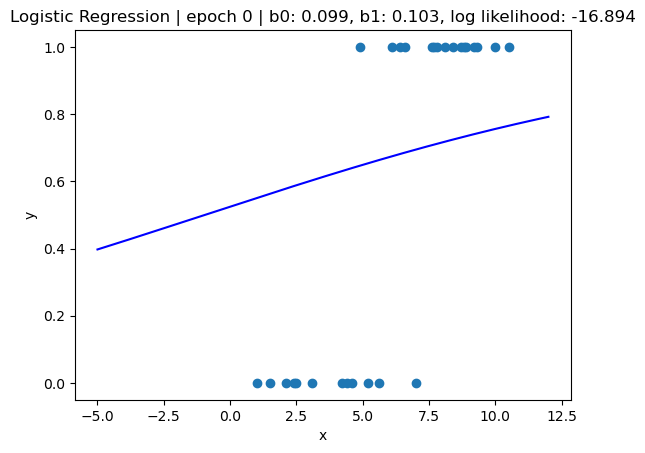

9999/100000
beta: [-4.88087235  0.8907215 ], log likelihood: -7.146
gradient: [ 0.02087868 -0.00329057]


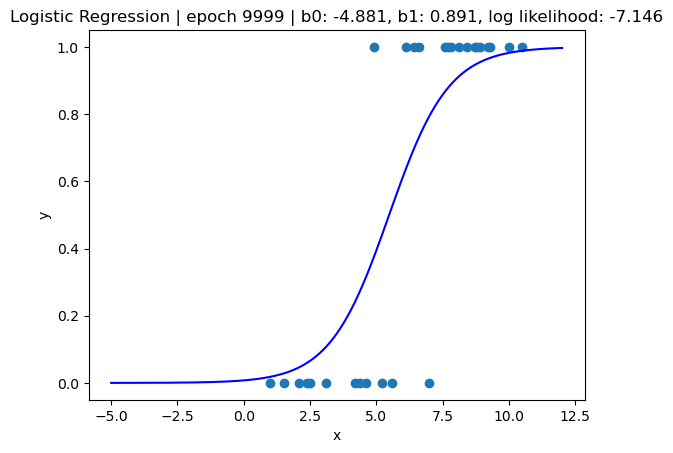

19999/100000
beta: [-6.32539408  1.12012786], log likelihood: -6.521
gradient: [ 0.01018471 -0.00162932]


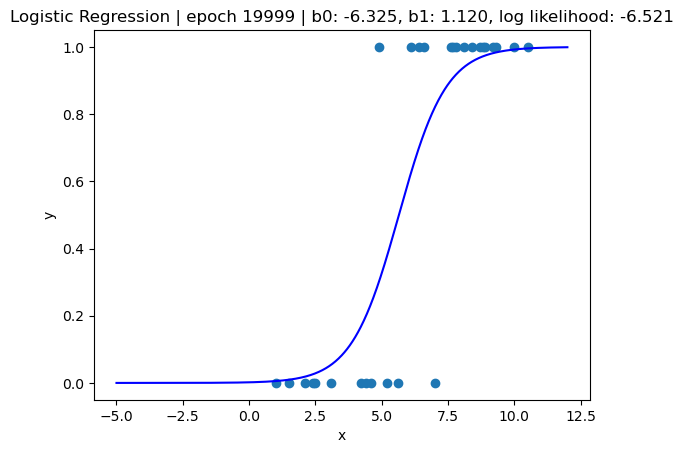

29999/100000
beta: [-7.12076679  1.24784427], log likelihood: -6.335
gradient: [ 0.00622025 -0.00100241]


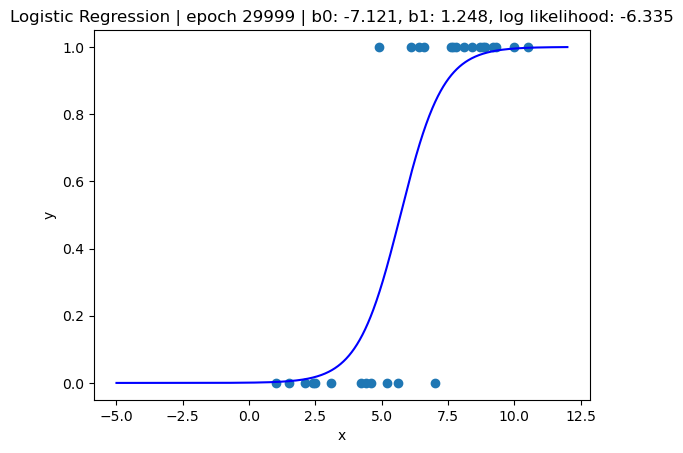

39999/100000
beta: [-7.63054309  1.33017459], log likelihood: -6.260
gradient: [ 0.004167  -0.0006744]


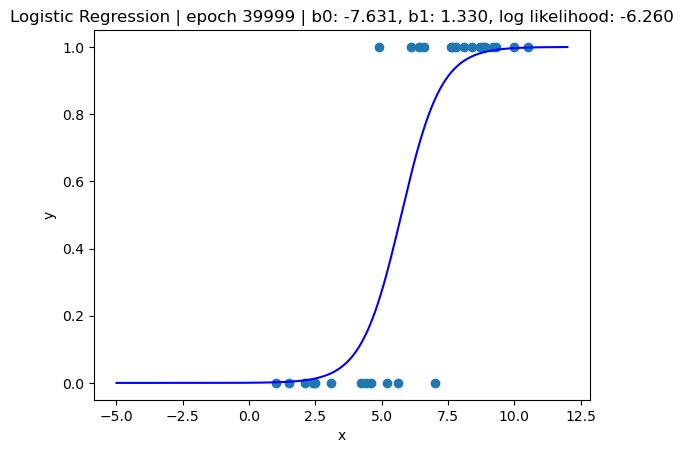

49999/100000
beta: [-7.98085586  1.38694883], log likelihood: -6.224
gradient: [ 0.00293336 -0.00047604]


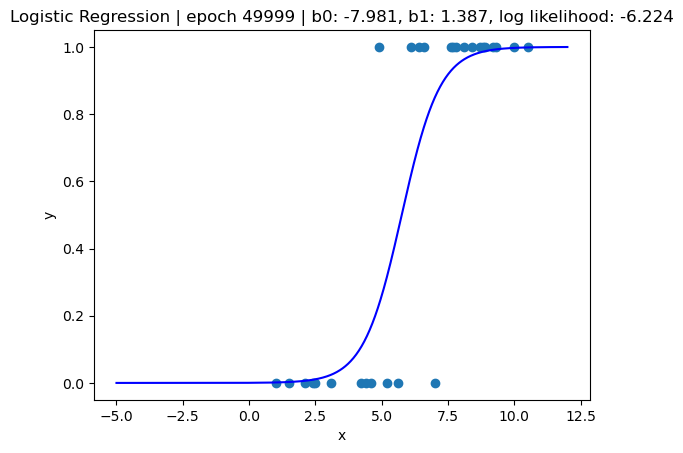

59999/100000
beta: [-8.2312841   1.42762784], log likelihood: -6.206
gradient: [ 0.00212829 -0.00034603]


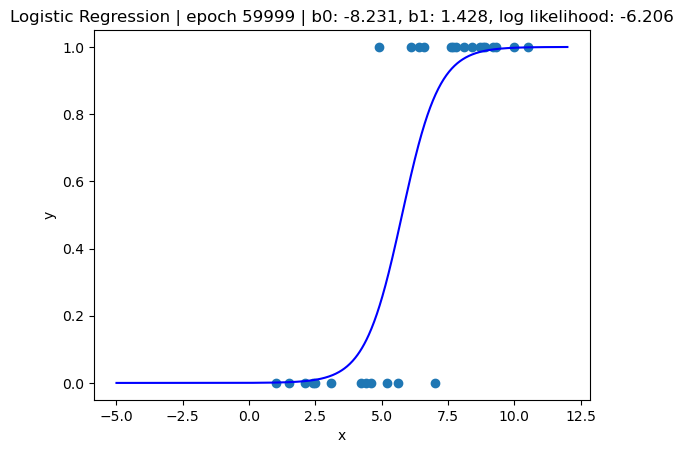

69999/100000
beta: [-8.41481963  1.45748778], log likelihood: -6.196
gradient: [ 0.00157515 -0.00025643]


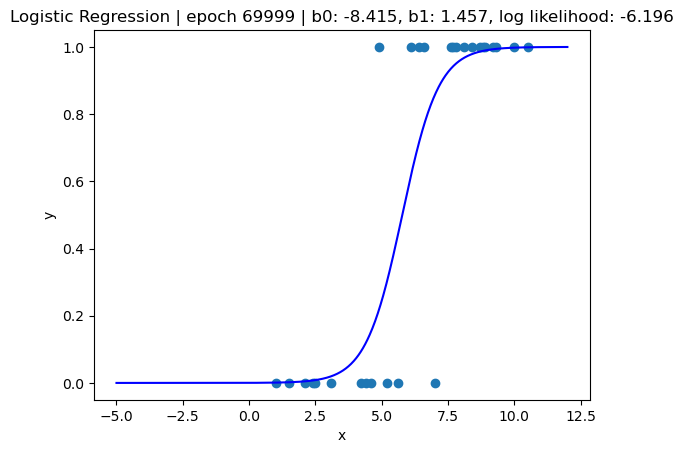

79999/100000
beta: [-8.55159756  1.47976541], log likelihood: -6.191
gradient: [ 0.00118186 -0.00019258]


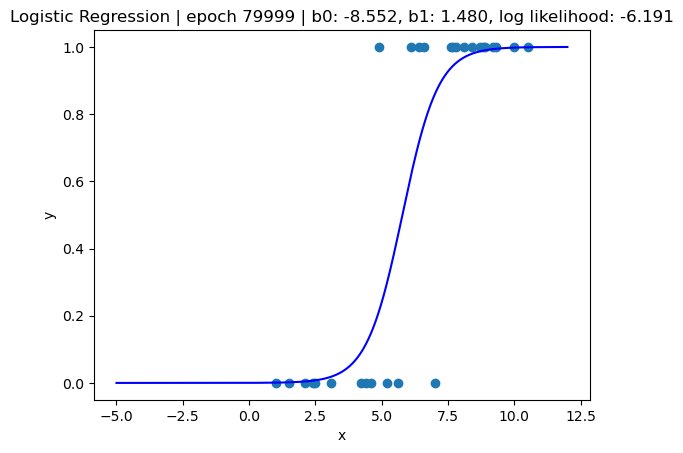

89999/100000
beta: [-8.65472923  1.49657656], log likelihood: -6.188
gradient: [ 0.00089546 -0.00014602]


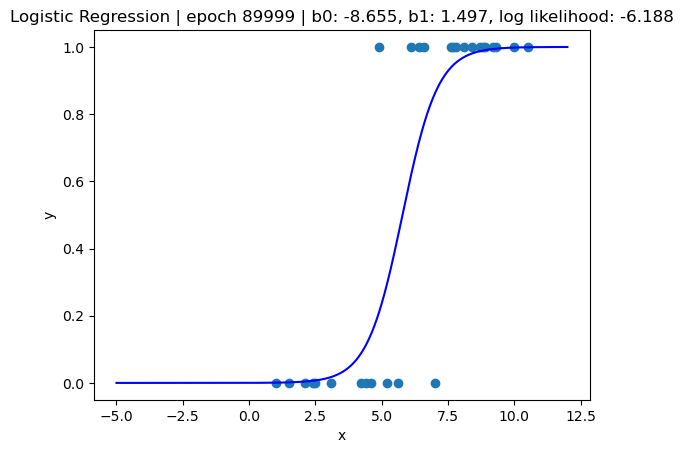

99999/100000
beta: [-8.73314901  1.50936718], log likelihood: -6.186
gradient: [ 0.0006833  -0.00011148]


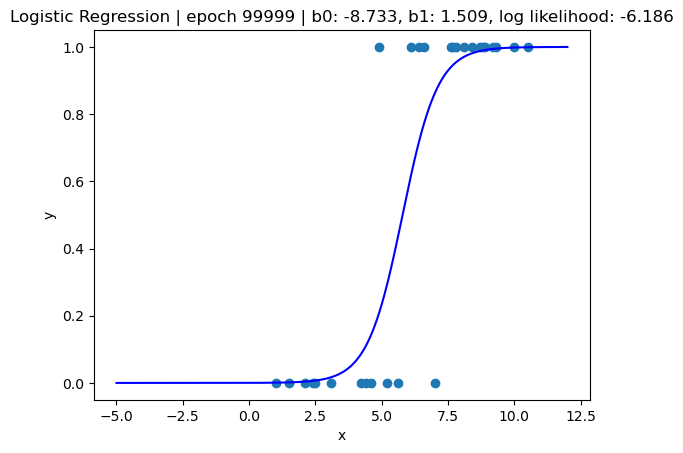

100000
beta: [-8.73314901  1.50936718], log likelihood: -6.186
gradient: [ 0.0006833  -0.00011148]


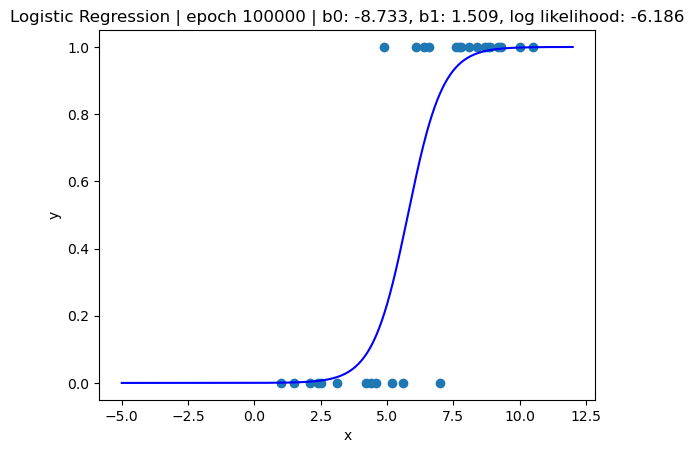

In [ ]:
def predict(X: np.ndarray, beta: np.ndarray):
    return 1/(1 + np.exp(-(X@beta)))

def calc_loss_values(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    return predict(X,beta)**y * (1-predict(X,beta))**(1-y)

def calc_loss_m(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> float:
    return np.prod(calc_loss_values(X, y, beta))

def calc_logloss_m(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> float:
    return np.sum(np.log(calc_loss_values(X, y, beta)))

def calc_gradient(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    y_hat = predict(X, beta)
    return X.T@(y_hat - y)

def calc_gradient_m(X: np.ndarray, y: np.ndarray, beta: np.ndarray, scaling_factor: float=None) -> np.ndarray:
    if scaling_factor is None:
        scaling_factor = 1/len(X)

    S = np.diag([scaling_factor]*X.shape[1])
    y_hat = predict(X, beta)

    return -S@X.T@(y-y_hat)

learning_rate = 0.01

epochs = 100000
best_logloss = -100000
b0 = 0.1
b1 = 0.1

x_vals = np.array([p.x for p in points])
const_vals = np.ones_like(x_vals)

X = np.stack([const_vals, x_vals],axis=1)
y = np.array([p.y for p in points])
beta = np.array([b0,b1])

for i in range(epochs):
    # if i > 1:
    #     break
    grad = calc_gradient_m(X,y,beta)

    beta -= learning_rate * grad

    logloss = calc_logloss_m(X,y,beta)

    if logloss > best_logloss:
        best_logloss = logloss
    if i == 0 or (i+1) % (epochs/10) == 0:
        print(f"{i}/{epochs}")
        print(f"beta: {beta}, log likelihood: {logloss:.3f}")
        print(f"gradient: {grad}")
        plot_result(range_x, beta[0], beta[1], points, logloss, i)

print(f"{epochs}")
print(f"beta: {beta}, log likelihood: {best_logloss:.3f}")
print(f"gradient: {grad}")
plot_result(range_x, beta[0], beta[1], points, logloss, epochs)

In [10]:
y_hat = predict(X, beta)
y_hat

array([7.28508981e-04, 1.54822268e-03, 3.82075966e-03, 5.99588599e-03,
       6.96594928e-03, 1.70549832e-02, 8.36461752e-02, 1.09883326e-01,
       1.43065369e-01, 2.07962686e-01, 2.92258614e-01, 4.30283933e-01,
       6.16327885e-01, 7.16425814e-01, 7.73586474e-01, 8.62049913e-01,
       9.39234418e-01, 9.47298896e-01, 9.54345125e-01, 9.70480067e-01,
       9.81026111e-01, 9.87851725e-01, 9.89535863e-01, 9.90988656e-01,
       9.94251373e-01, 9.95052759e-01, 9.98274520e-01, 9.99188007e-01])